# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

# Downloading Dataset

In [2]:
start = datetime(2010,1,1)

end = datetime(2023,12,31)

df=yf.download('AAPL',start=start,end=end)
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


# Removing Date  and Adj Close Column

In [3]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [4]:
df=df.drop(['Date','Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


# Plotting Graph-based upon Closing Value

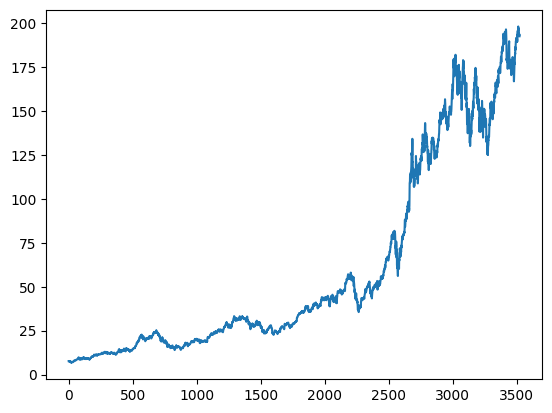

In [5]:
plt.plot(df.Close)

# Moving Average 100
### Gives me the value for 101th day which is mean of previous 100 days

In [6]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

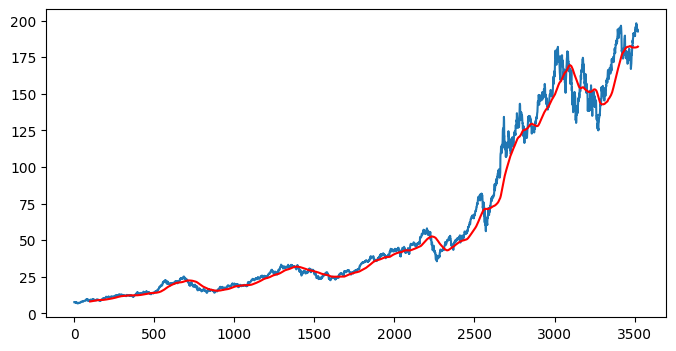

In [49]:
plt.figure(figsize=(8,4))
plt.plot(df.Close)
plt.plot(ma100,'red')

# Moving Average 200
### Gives me the value for 201th day which is the mean of the previous 200 days

In [8]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

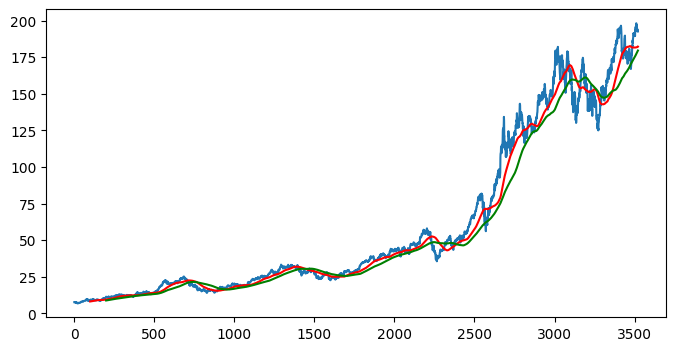

In [50]:
plt.figure(figsize=(8,4))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [10]:
df.shape

(3522, 5)

# Splitting data into training and testing

In [11]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70) :int(len(df))])

In [12]:
print(data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


# Scaling down the training data into 0 to 1 range

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [15]:
x_train=[]
y_train=[]


for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

# ML Model

In [17]:
model = Sequential()
model.add(LSTM(units =50, activation ='relu', 
               return_sequences=True , input_shape = (x_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation ='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units =80, activation ='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation ='relu' ))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\spars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
print(x_train.shape)
print(y_train.shape)

(2365, 100, 1)
(2365,)


In [20]:
model.compile(optimizer='adam' , loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 205ms/step - loss: 0.0748
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - loss: 0.0092
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - loss: 0.0064
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - loss: 0.0066
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - loss: 0.0059
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - loss: 0.0057
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - loss: 0.0050
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - loss: 0.0044
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 224ms/step - loss: 0.0046
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - loss: 0.0043
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 245ms/step - loss: 0.0045
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - loss: 0.0036
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - loss: 0.0040
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 254ms/step - loss: 0.0038
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [21]:
model.save('LSTM_model.h5')

In [22]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [32]:
past_100_days=data_training.tail(100)

In [33]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [34]:
final_df.head()

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [35]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [36]:
input_data.shape

(1157, 1)

In [37]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [38]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


### Making Predictions

In [39]:
from keras.models import load_model
# Load the model
model = load_model('LSTM_model.h5')

In [40]:
y_predicted=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step


In [41]:
y_predicted.shape

(1057, 1)

In [42]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [43]:
y_predicted

array([[0.14162472],
       [0.14278248],
       [0.1439654 ],
       ...,
       [0.91048837],
       [0.90776974],
       [0.90430766]], dtype=float32)

In [44]:
scaler.scale_

array([0.00646057])

In [45]:
scale_factor = 1/0.00646057
y_predicted= y_predicted * scale_factor
y_test = y_test* scale_factor

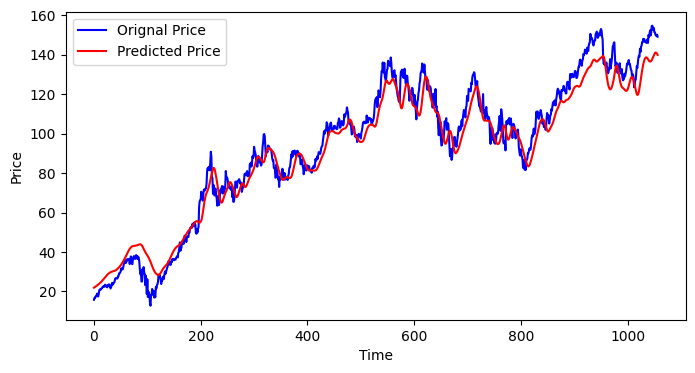

In [51]:
plt.figure(figsize=(8,4))
plt.plot(y_test,'b',label='Orignal Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.9570537007629103
